1. IMPORTING MODULES

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import mediapipe as mp
import numpy as np
import os

2. DEFINING MEDIAPIPE HAND MODEL

In [2]:
mp_hands = mp.solutions.hands 
hands = mp_hands.Hands(static_image_mode=True,
                       min_detection_confidence=0.3,
                       max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

3 IMAGE PROCESSING

3.1 DEFINING DIRECTORY

In [29]:
IMG_DIR ='./Image/'
crop_image_dir = './Cropped_Image/'
landmark_img_dir = './Hand_Landmark_Image'

3.2 CHECKING DIRECTORY

In [34]:
for dir_ in sorted(os.listdir(IMG_DIR),key = lambda x: int(x)):
    if not os.path.exists(os.path.join(crop_image_dir,str(dir_))):
        os.makedirs(os.path.join(crop_image_dir,str(dir_)))
    if not os.path.exists(os.path.join(landmark_img_dir,str(dir_))):
        os.makedirs(os.path.join(landmark_img_dir,str(dir_)))
    

3.3 CROPING ORGINAL SIZE BY 200 * 200  BY DETECTING PALM

In [43]:
def crop_image(results,frame,SQUARE_SIZE):
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        
        x = hand_landmarks.landmark[9].x * frame.shape[1]
        y = hand_landmarks.landmark[9].y * frame.shape[0]
        
        w = hand_landmarks.landmark[12].x * frame.shape[1] - x
        h = hand_landmarks.landmark[12].y * frame.shape[0] -y 
        
        x_center = int(x)
        y_center = int(y)
        
        x1 = int(x_center - SQUARE_SIZE/2)
        y1= int(y_center - SQUARE_SIZE/2)
        return (x1,y1)

3.4 CREATING HAND LANDMARK CONNECTION 

In [47]:
def create_hand_landmark(results,mask):
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(mask,
                                      hand_landmarks,
                                      mp_hands.HAND_CONNECTIONS,
                                      mp_drawing_styles.DrawingSpec(color=(255,0,255),thickness=1,circle_radius=1),
                                      mp_drawing_styles.DrawingSpec(color=(255,0,255),thickness=1,circle_radius=1))
    return mask
        

3.5 MAIN IMAGE PROCESSING CODE

In [52]:

for dir_ in sorted(os.listdir(IMG_DIR),key = lambda x: int(x)):
    # print(dir_)
    for category in sorted(os.listdir(os.path.join(IMG_DIR,str(dir_))),key = lambda x: int(os.path.splitext(x)[0])):
        # print(category)
        img_path = os.path.join(IMG_DIR,str(dir_),str(category))
        # print(img_path)
        
        frame = cv2.imread(img_path)
        H,W,_ = frame.shape
        image_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        SQUARE_SIZE =200
        results = hands.process(image_rgb)
        
        try:
            # CROPPING IMAGE
            (x1,y1)= crop_image(results,frame,SQUARE_SIZE)
            cropped_img = frame[y1:y1+SQUARE_SIZE,x1:x1+SQUARE_SIZE]
            cv2.imwrite(os.path.join(crop_image_dir,str(dir_),str(category)),cropped_img)
            
            
            # CREATING HAND LANDMARK FROM CROPPED IMAGE
            img1 = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
            results = hands.process(img1)
            mask = np.zeros_like(img1) #create blank mask
            mask = create_hand_landmark(results,mask)
            masked_img = cv2.bitwise_and(img1,mask)
            cv2.imwrite(os.path.join(landmark_img_dir,str(dir_),str(category)),masked_img)
            
        except Exception as e: 
            print(img_path)
        
        

TESTING

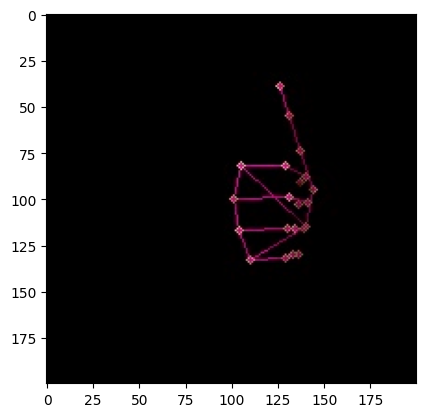

In [62]:
a= cv2.imread('./Hand_Landmark_Image/0/0.jpg')
a = cv2.cvtColor(a,cv2.IMREAD_GRAYSCALE)
plt.imshow(a)

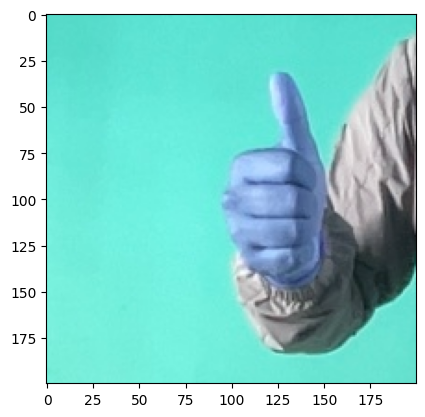

In [58]:
plt.imshow(cropped_img)